Instead of experimenting with the epoch-variable to optimize the neural network or to avoid overfitting, I implement this feature in the neural network:
- Dropout-layers

## Uploading data, X-y variables, Train/test/validation split

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [7]:
# upload data
df = pd.read_csv("balanced_data.csv")

In [8]:
# leave out the target variable! (dependent variable)
X = df[['Year', 'Mileage', 'City', 'State', 'Make', 'Model']]

# have only the target variable here (dependent variable)
y = df['Price']

In [9]:
# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

## Development of the neural network

In [10]:
# Number of input features (after dropping the target column)
variable_amount = len(X.columns)

# ModelCheckpoint to save the best model based on validation loss
mc = ModelCheckpoint('best_model_regression1.keras', monitor='val_loss', mode='min', save_best_only=True)

# Combine callbacks into a list (can include more if needed, e.g., EarlyStopping)
callback_list = [mc]

# Define Sequential neural network model with Dropout layers
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),  # Another Dropout layer
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.2),  # Another Dropout layer
        layers.Dense(1)  # Output layer for regression (1 node, no activation function)
    ]
)

# Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer='adam', loss='mse')

# Print out the summary of the model
model.summary()

# Train the model with the dataset and apply the callbacks
history = model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val), callbacks=callback_list)



# CHANGES to the original one

# Dropout Layers Added:
# Added Dropout layers with a dropout rate of 20% after 
# each Dense layer (except the output layer). This randomly 
# drops 20% of the neurons during training, which helps 
# to prevent overfitting.

# Increased Model Complexity:
# I increased the number of neurons in the first layer to 64, 
# then decreased them in subsequent layers. This gives the model 
# more “decision space” to work with while still reducing overfitting 
# risks with Dropout layers.

# Regularization:
# The l1_l2 regularizer is used on the first Dense layer to add both 
# L1 and L2 penalties, which further helps in preventing overfitting.


/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,097 (12.10 KB)

 Trainable params: 3,085 (12.05 KB)

 Non-trainable params: 12 (48.00 B)

Epoch 1/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 3s 453us/step - loss: 137043040.0000 - val_loss: 32549648.0000
Epoch 2/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 438us/step - loss: 46422048.0000 - val_loss: 31874542.0000
Epoch 3/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step - loss: 45895736.0000 - val_loss: 32151906.0000
Epoch 4/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step - loss: 46046716.0000 - val_loss: 31544540.0000
Epoch 5/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - loss: 45555976.0000 - val_loss: 32446252.0000
Epoch 6/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 438us/step - loss: 45751508.0000 - val_loss: 32091256.0000
Epoch 7/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step - loss: 45737564.0000 - val_loss: 31736420.0000
Epoch 8/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step - loss: 46097980.0000 - val_loss: 31811218.0000
Epoch 9/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - loss: 45932736.0000 - val_loss: 32458572.0000
Epoch 10/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 465us/s

## Error metrics

<Axes: >

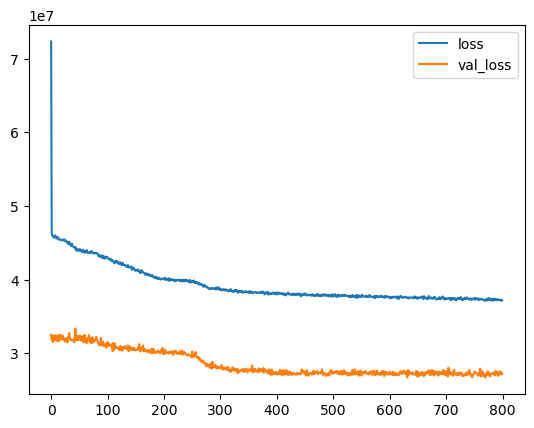

In [11]:
# training and validation loss over epochs 
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# insights:
# this is untypical pattern for loss and val_loss
# there are some suggestions why it is happened:
# 1. probably, the validation set is easier for the model 
# to predict than the training set
# 2. Dropout might intentionally make the model perform worse 
# on the training data to avoid overfitting
# 3. there is a possibility of underfitting (the model is too simple now)
# 4. or maybe we there is no enough epochs for training 
# that is why loss does not reach the bottom of the graph

In [12]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

# the model is often good when these error values are similar
# compared to the original one and to optimization files 2 and 3
# it shows the best result

Test data evaluation:
27409974.0

Train data evaluation:
27148948.0


In [13]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

# insights:
# Dropout-layers slightly helped to improve the model
# but not any big influence

985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step


,Test True Y,Model Predictions
0,24875,18638.744141
1,25989,20795.275391
2,17500,18843.023438
3,18350,19901.367188
4,20989,18799.572266
...,...,...
31506,14000,16332.980469
31507,17290,19400.943359
31508,19950,19693.970703
31509,15500,19368.384766


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

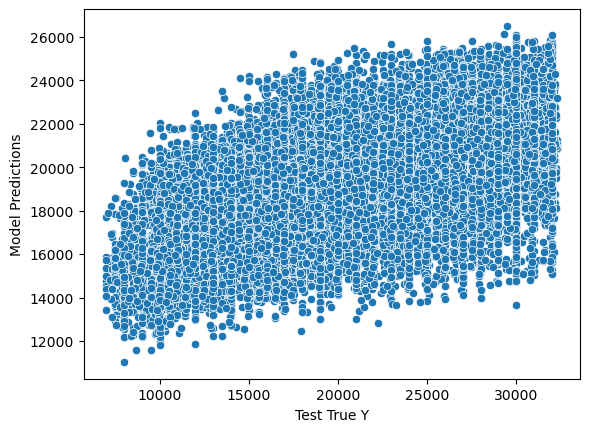

In [14]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

# the same picture as in the original model

In [15]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))


# MAE
# Lower is better
# Original is 4841.92 $
# Now is 4285.15 $
# almost the same result

# MSE
# Lower is better
# Original is 34666769.92 $^2
# Now is 27409965.56 $^2
# now it shows the better result than in the 1st time
# and even better than I implemented EarlyStop
# I suppose, this is because with the EarlyStop technique
# the model does not have enough time to train

# RMSE
# Lower is better
# Original is 5887.85 $
# Now is 5235.45 $
# better

# R-squared
# Closer to 1 is better
# Original is 0.07
# Now is 0.27
# there is a significant increase
# Dropout layer helped to improve this metric


# Explained variance score
# Closer to 1 is better
# Original is 0.1
# Now is 0.28
# there is a significant increase
# Dropout layer helped to improve this metric

# To sum up,


MAE
4285.15 $

MSE
27409965.56 $^2

RMSE:
5235.45 $

R-squared:
0.27

Explained variance score:
0.28
